In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import yaml
from pprint import pprint


In [150]:
def plot_rcm(RC_matrix, 
             add_diagonal_label, 
             normalize,
             cmax,
             cmin,
             threshold,
             colormap_name,
             double_diagonal_prefix_1,
             double_diagonal_prefix_2,
             single_diagonal_prefix,
             diagonal_lable_color,
             add_clock_label,
             t_count,
             t_label,
             t_steps_to_label,
             variable_name,
             x_prefix,
             y_prefix):

    """ 
    Generates an RCM plot from the given data.
    
    Prepare your data to be a data cube with the following structure:
    `RC_matrix[time_dimension, y_dimension, x_dimension]`

    See `rcm_settins.yaml` file for inputs.

    Zafer Defne 6/24/2025
    """

    if normalize == True:
        norm = Normalize(vmin=cmin, vmax=cmax)
    else:
        norm = Normalize()

    if threshold != "":
        print(f"Threshold is set to : {threshold}")
    cmap = plt.get_cmap(colormap_name)

    # Clock and matrix dimensions
    t_count = RC_matrix.shape[0]
    theta = np.linspace(0, 2*np.pi, t_count + 1)

    y_count = RC_matrix.shape[1]
    x_count = RC_matrix.shape[2]

    fig, axs = plt.subplots(y_count, x_count, subplot_kw={'projection': 'polar'}, figsize=(10, 10))
    plt.subplots_adjust(wspace=0.05, hspace=0.05)

    for si in range(y_count):        # source (rows)
        for di in range(x_count):    # destination (columns)
            ax = axs[si, di]
            ax.set_theta_zero_location('N')
            ax.set_theta_direction(-1)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_ylim(0, 1)
            if si == di:
                ax.set_facecolor([0.5, 0.5, 0.5])
            else:
                ax.set_facecolor([0.8, 0.8, 0.8])

            P = RC_matrix[:, si, di]

            if threshold != "" or np.nanmax(P) > threshold:
                for i in range(t_count):
                    val = P[i]
                    if not np.isnan(val):
                        ax.bar(
                            x=theta[i],
                            height=1,
                            width=theta[i+1] - theta[i],
                            bottom=0,
                            color=cmap(norm(val)),
                            align='edge'
                        )
                        if di == 0 and si == 0 and i in t_steps_to_label:
                            ax.text(theta[i], 0.75, f"{t_label} \n {i}", 
                                    ha='center', va='center', fontsize=8)
            # Y-axis label (source polygons)
            if di == 0:
                ax.annotate(f"{y_prefix} {si+1}", xy=(0, 0.5), xycoords='axes fraction',
                            ha='right', va='center', fontsize=8, rotation=90)

            # X-axis label (destination polygons)
            if si == x_count - 1:
                ax.annotate(f"{x_prefix} {di+1}", xy=(0.5, -0.15), xycoords='axes fraction',
                            ha='center', va='top', fontsize=8)



            # Diagonal tile label
            if add_diagonal_label == "Default":
                diagonal_label = f"{y_prefix} {si + 1}, {y_prefix} {di + 1}"
            elif add_diagonal_label == "Single":
                diagonal_label = f"{single_diagonal_prefix} {si + 1}"
            elif add_diagonal_label == "Double":
                diagonal_label = f"{double_diagonal_prefix_1} {si + 1}, {double_diagonal_prefix_2}, {y_prefix} {di + 1}"
            else:
                add_diagonal_label == "None"

            if add_diagonal_label != "None":
                if si == di:
                    ax.text(0, 0, diagonal_label, ha="center", va="center", fontsize=8, color = diagonal_lable_color)

    # Add colorbar
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=axs.ravel().tolist(), fraction=0.025, pad=0.01).set_label(variable_name)

    fig.suptitle("Relation Clock Matrix", fontsize=14)
    plt.show()


In [151]:
with open("rcm_input.yaml", 'r') as file:
    in_args = yaml.safe_load(file)

In [ ]:
# Sample inputs (replace these with your actual data)
P_test= np.random.rand(12, 3, 3)  # shape: (num_timesteps, source, destination)

Threshold is set to : 0.001


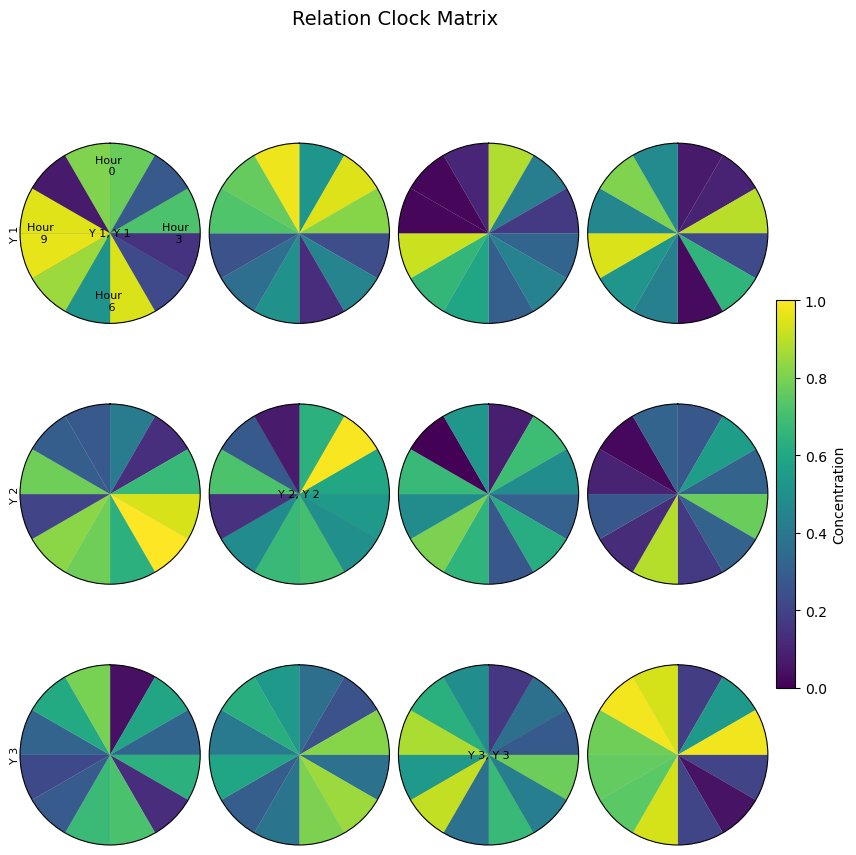

In [153]:
plot_rcm(P_test, **in_args)